In [64]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [164]:
df = pd.read_csv('employee.csv')
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# 2. Reset the index as "name".

In [165]:
df = pd.read_csv('employee.csv',index_col = 'name')
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [97]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [98]:
df[df['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [99]:
condition = df['performance_score'] > 700
high_performers = df.loc[condition].index

print(high_performers)

Index(['Allen Smith', 'Dheeraj Patel', 'Josh Wills', 'Leo Duck'], dtype='object', name='name')


# 6. Display employee who has more than 500 and less than 700 performance score

In [101]:
condition2 = (df['performance_score'] > 500) & (df['performance_score'] < 700)
mid_performers = df.loc[condition2].index

print(mid_performers)

Index(['S Kumar', 'Jack Morgan', 'Ying Chin', 'Satyam Sharma'], dtype='object', name='name')


# 7. Check and handle missing values in the dataset.

In [153]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [154]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

Missing data in age, income and gender columns

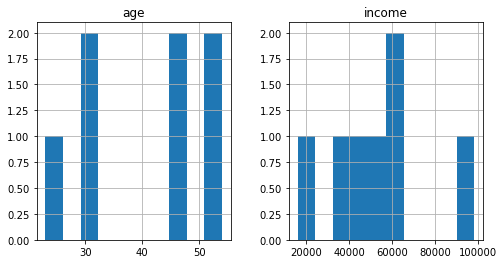

In [104]:
freq_graph = df.select_dtypes(include = 'float')
freq_graph.hist(figsize = (8,4))
plt.show()

In [166]:
#Using median to fill the null values in age and income columns
df['age']= df['age'].fillna(df['age'].median())
df['income']= df['income'].fillna(df['income'].median())
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


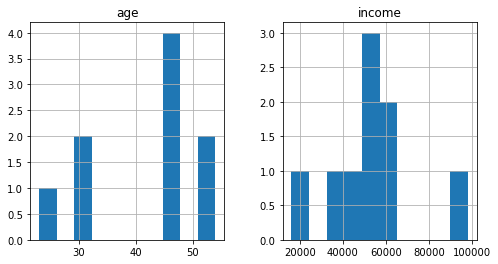

In [146]:
freq_graph = df.select_dtypes(include = 'float')
freq_graph.hist(figsize = (8,4))
plt.show()

In [167]:
#using mode to fill the null values in gender column
df['gender']= df['gender'].fillna(df['gender'].mode()[0]) #returns the first mode value from the series returned.
df


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [169]:
#checking for null again
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.


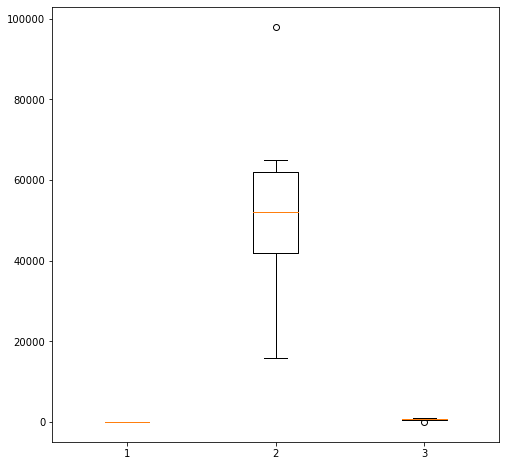

In [108]:
plt.figure(figsize=(8,8))
plt.boxplot(df[['age','income','performance_score']])

plt.show()

There are no outliers in age column

In [109]:
Q1 = np.percentile(df['income'],25,interpolation = 'midpoint')
Q2 = np.percentile(df['income'],50,interpolation = 'midpoint')
Q3 = np.percentile(df['income'],75,interpolation = 'midpoint')

IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
up_limit = Q3 + (1.5*IQR)


print(low_limit,up_limit)
        

12000.0 92000.0


In [110]:
outlier = []
for x in df['income']:
    if ((x < low_limit) or (x > up_limit)):
        outlier.append(x)
outlier

[98000.0]

In [111]:
ind1 = df['income']>up_limit
df.loc[ind1].index


Index(['Leo Duck'], dtype='object', name='name')

In [112]:
df.drop([ 'Leo Duck'],inplace = True)

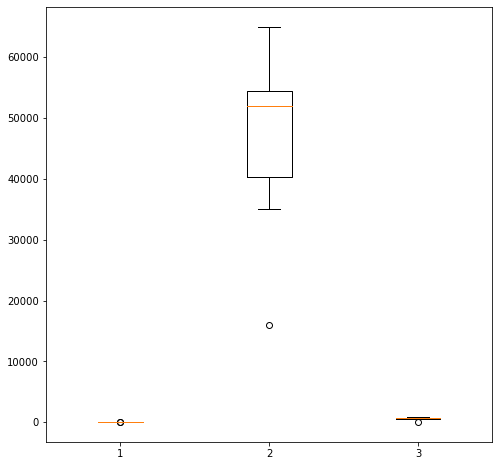

In [113]:
plt.figure(figsize=(8,8))
plt.boxplot(df[['age','income','performance_score']])

plt.show()

In [114]:
Q1 = np.percentile(df['performance_score'],25,interpolation = 'midpoint')
Q2 = np.percentile(df['performance_score'],50,interpolation = 'midpoint')
Q3 = np.percentile(df['performance_score'],75,interpolation = 'midpoint')

IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
up_limit = Q3 + (1.5*IQR)


print(low_limit,up_limit)

269.5 985.5


In [115]:
outlier = []
for x in df['performance_score']:
    if ((x < low_limit) or (x > up_limit)):
        outlier.append(x)
outlier

[53]

In [116]:
ind2 = df['performance_score']<low_limit
df.loc[ind2].index

Index(['James Authur'], dtype='object', name='name')

In [170]:
#dropping the outlier
df.drop([ 'James Authur'],inplace = True)

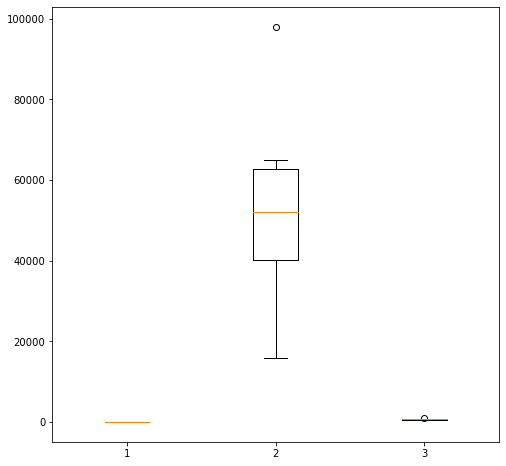

In [171]:
plt.figure(figsize=(8,8))
plt.boxplot(df[['age','income','performance_score']])

plt.show()

# 9. Check the gender column and do Dummy encoding.


In [172]:
#Ref: https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db
#pd.get_dummies(data, prefix, dummy_na, columns, drop_first)

df_dummy = pd.get_dummies(df['gender'],drop_first = True)
df_dummy


,M
name,
Allen Smith,0
S Kumar,0
Jack Morgan,1
Ying Chin,0
Dheeraj Patel,0
Satyam Sharma,0
Josh Wills,0
Leo Duck,1


# 10.Do the standard scaling on the feature performance score.

In [139]:
df['performance_score'].describe()

count      7.000000
mean     676.285714
std      124.851531
min      520.000000
25%      602.500000
50%      674.000000
75%      717.000000
max      901.000000
Name: performance_score, dtype: float64

In [138]:
converted_array =np.array(df['performance_score']).reshape(-1, 1) #reshape as fit_transform will not work on series

from sklearn import preprocessing 

standardisation = preprocessing.StandardScaler()
df_StdScaled = standardisation.fit_transform(converted_array)

df_StdScaled = pd.DataFrame(df_StdScaled)
df_StdScaled.describe()

,0
count,7.000000e+00
mean,-4.123686e-16
std,1.080123e+00
min,-1.352069e+00
25%,-6.383396e-01
50%,-1.977432e-02
75%,3.522300e-01
max,1.944062e+00
